# Equalization and Normalization
In this notebook, we will look at histogram modification methods:

* Histogram Equalization
* Normalization
* Histogram matching

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ECE1390_HistMatching

In [2]:
# Load the images
img_campus_bgr = cv2.imread(os.path.relpath('../../Data/PittCampus_BadContrast.png'), cv2.IMREAD_COLOR)
img_campus_good_bgr = cv2.imread(os.path.relpath('../../Data/PittCampus.png'), cv2.IMREAD_COLOR)
img_campus_good2_bgr = cv2.imread(os.path.relpath('../../Data/PittCampus_Bright.png'), cv2.IMREAD_COLOR)

# convert to RGB format 
img_campus = cv2.cvtColor(img_campus_bgr,cv2.COLOR_BGR2GRAY)
img_campus_good = cv2.cvtColor(img_campus_good_bgr,cv2.COLOR_BGR2GRAY)

img_campus_rgb = cv2.cvtColor(img_campus_bgr,cv2.COLOR_BGR2RGB)
img_campus_good_rgb = cv2.cvtColor(img_campus_good_bgr,cv2.COLOR_BGR2RGB)
img_campus_good2_rgb = cv2.cvtColor(img_campus_good2_bgr,cv2.COLOR_BGR2RGB)


## Equalization
Equalization remaps the histogram such that the distribution is more uniform

This function only operates on GrayScale (monochromatic) images, so we need to do each color seperately

Text(0.5, 1.0, 'Equalized')

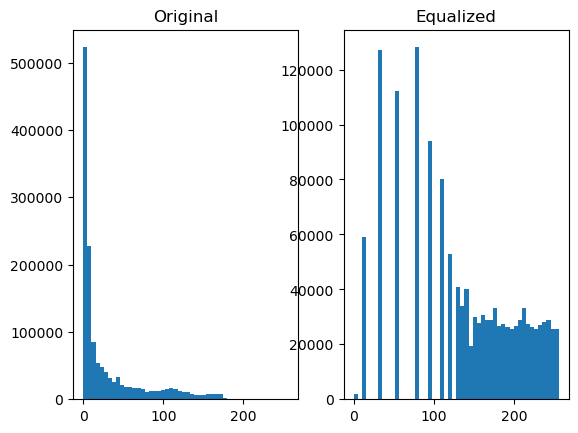

In [3]:
img_campus_equalized= cv2.equalizeHist(img_campus)

fig, axes = plt.subplots(nrows=1,ncols=2)

axes[0].hist(img_campus.ravel(),50,[0,256])
axes[0].set_title("Original")

axes[1].hist(img_campus_equalized.ravel(),50,[0,256])
axes[1].set_title("Equalized")


Text(0.5, 1.0, 'Equalized')

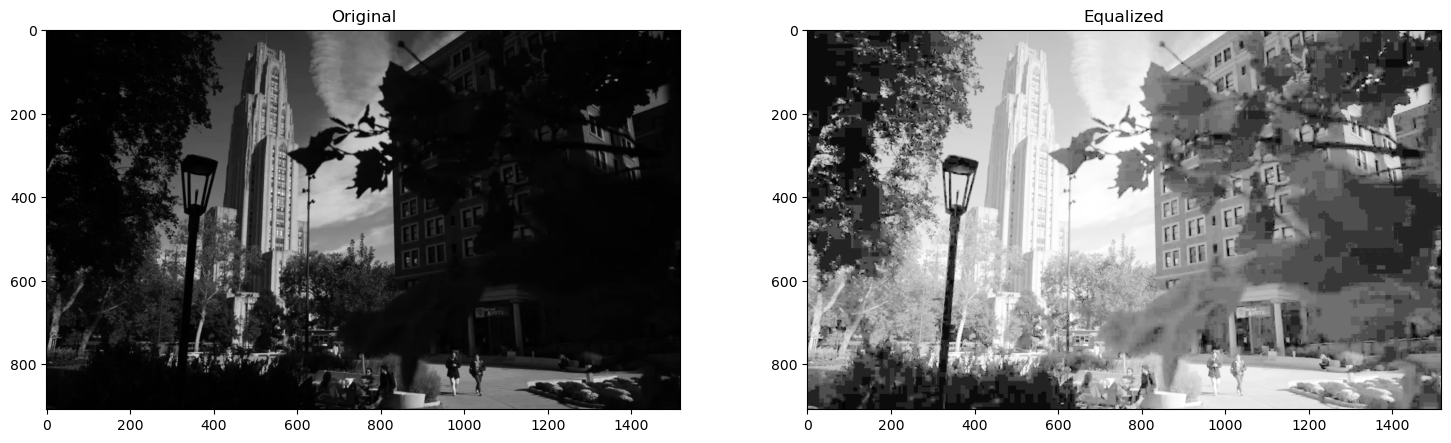

In [4]:
# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_campus,cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_campus_equalized,cmap="gray");  plt.title("Equalized")



## Histogram matching
Histogram matching tries to match two histograms to each other instead of just flattening the distribution

Here I have a similar image (but better quality) of the Pitt campus

In [5]:

img_matched=ECE1390_HistMatching.match_histograms(img_campus,img_campus_good)

# This function will work for color images as well, so let's see it in color
img_matched_rgb=ECE1390_HistMatching.match_histograms(img_campus_rgb,img_campus_good_rgb)

Text(0.5, 1.0, 'Matched')

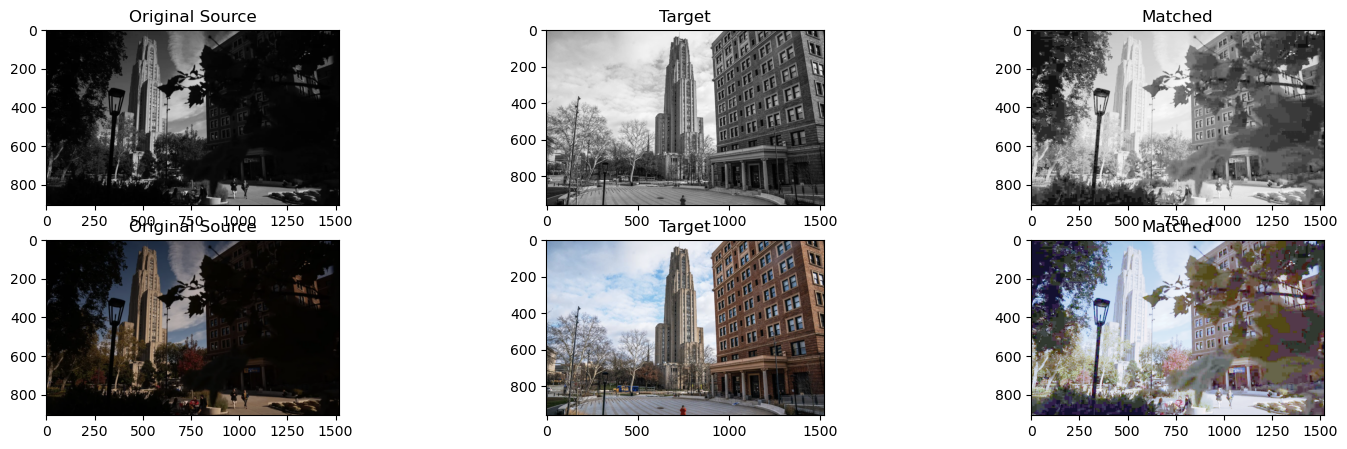

In [6]:
# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(231);plt.imshow(img_campus,cmap="gray");  plt.title("Original Source")
plt.subplot(232);plt.imshow(img_campus_good,cmap="gray");  plt.title("Target")
plt.subplot(233);plt.imshow(img_matched,cmap="gray");  plt.title("Matched")

plt.subplot(234);plt.imshow(img_campus_rgb);  plt.title("Original Source")
plt.subplot(235);plt.imshow(img_campus_good_rgb);  plt.title("Target")
plt.subplot(236);plt.imshow(img_matched_rgb);  plt.title("Matched")


Text(0.5, 1.0, 'Matched')

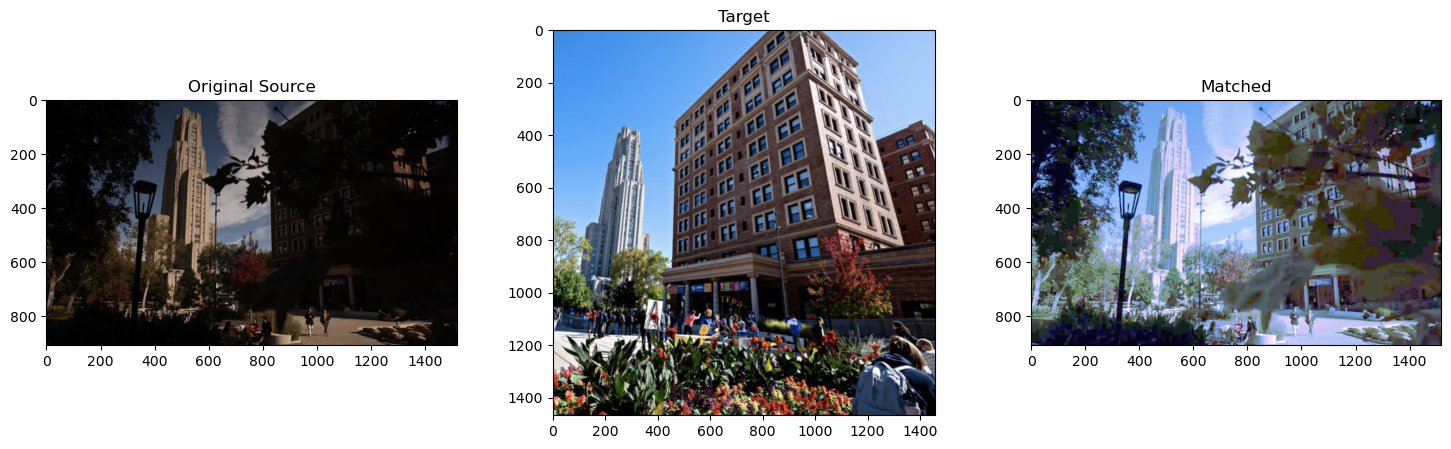

In [7]:
# If we use a target with a bit more blue and green, we can bring out those colors in the image more
img_matched2_rgb=ECE1390_HistMatching.match_histograms(img_campus_rgb,img_campus_good2_rgb)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(131);plt.imshow(img_campus_rgb);  plt.title("Original Source")
plt.subplot(132);plt.imshow(img_campus_good2_rgb);  plt.title("Target")
plt.subplot(133);plt.imshow(img_matched2_rgb);  plt.title("Matched")


## Normalization
Normalization makes sure that the full range (0-255) of the image is used.

The image will actually look the same in imshow because imshow automatically normalizes the range for 
display unless you provide the additional vmin/vmax inputs  

Text(0.5, 1.0, 'Normalized')

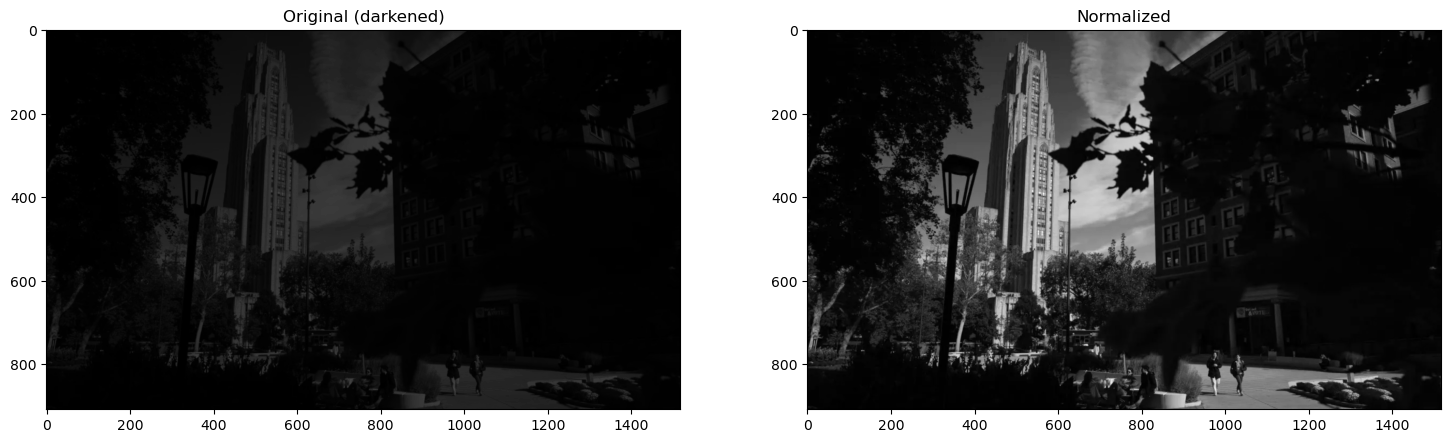

In [8]:
# Normalize to between 0 - 255 
img_campus_nomalized=cv2.normalize(img_campus/3,None,0,255,cv2.NORM_MINMAX)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_campus/3,cmap="gray",vmin=0,vmax=255);  plt.title("Original (darkened)")
plt.subplot(122);plt.imshow(img_campus_nomalized,cmap="gray",vmin=0,vmax=255);  plt.title("Normalized")


## Gamma Correction
Gamma correction corrects for your eye not sensing intensity linearly.  

ImageNew = Image ^(1/Gamma)

gamma < 1 --> Darker
gamma = 1 --> no change
gamma > 1 --> brighter

Text(0.5, 1.0, 'Gamma = 10')

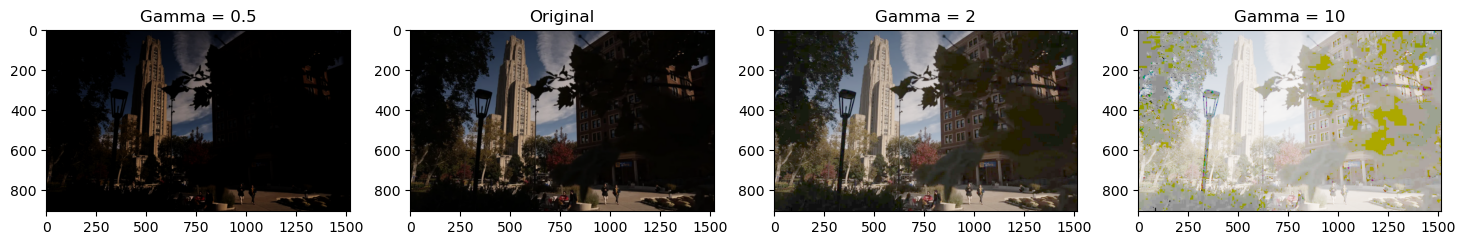

In [9]:
img_campus_gamma_p5=ECE1390_HistMatching.gamma_correction(img_campus_rgb,.5)
img_campus_gamma_2=ECE1390_HistMatching.gamma_correction(img_campus_rgb,2)
img_campus_gamma_10=ECE1390_HistMatching.gamma_correction(img_campus_rgb,10)


# Show the images
plt.figure(figsize=[18, 5])


plt.subplot(141);plt.imshow(img_campus_gamma_p5);  plt.title("Gamma = 0.5")
plt.subplot(142);plt.imshow(img_campus_rgb);  plt.title("Original")
plt.subplot(143);plt.imshow(img_campus_gamma_2);  plt.title("Gamma = 2")
plt.subplot(144);plt.imshow(img_campus_gamma_10);  plt.title("Gamma = 10")



Text(0.5, 1.0, 'Alpha Blend')

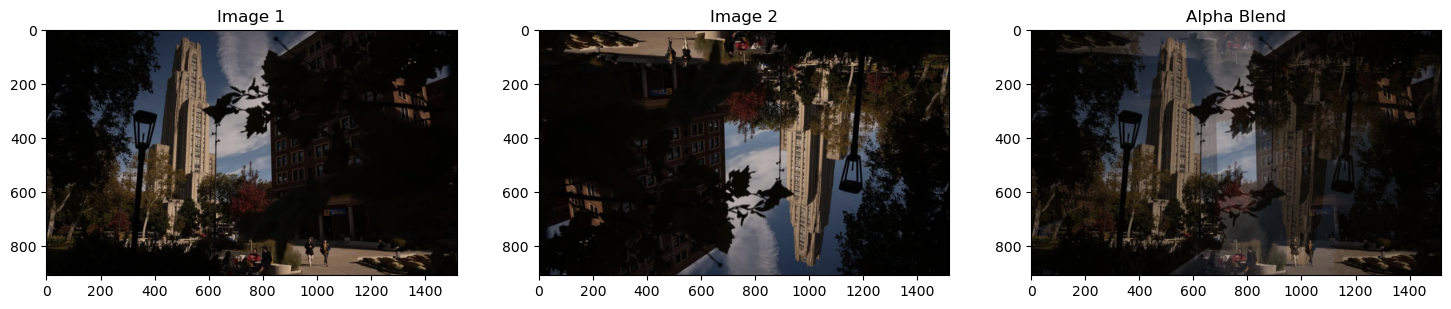

In [10]:
im_merged=ECE1390_HistMatching.alpha_blend(img_campus_rgb,cv2.flip(img_campus_rgb,-1),.3)


# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(131);plt.imshow(img_campus_rgb);  plt.title("Image 1")
plt.subplot(132);plt.imshow(cv2.flip(img_campus_rgb,-1));  plt.title("Image 2")
plt.subplot(133);plt.imshow(im_merged);  plt.title("Alpha Blend")